# ResNet CIFAR-10 Classifier: Experiment Results

In [1]:
# Imports
import os
import re
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# Extract and store results from logs

# Define paths
log_dir = './logs'

# Regex patterns to extract values
epoch_pattern = re.compile(r'Epoch:\s*(\d+)/\d+\s*LR:\s*([\d.]+)')
train_pattern = re.compile(r'TRAIN:\s*Loss:\s*([\d.]+)\s*Acc:\s*([\d.]+)%')
test_pattern = re.compile(r'TEST:\s*Loss:\s*([\d.]+)\s*Acc:\s*([\d.]+)%')

# Experiment results
experiments = {}

# Loop through log files
for log_file in sorted(os.listdir(log_dir)):  
    exp_name = log_file.replace('.txt', '')
    file_path = os.path.join(log_dir, log_file)

    epochs, learning_rates, train_loss, train_acc, test_loss, test_acc = [], [], [], [], [], []

    with open(file_path, 'r') as f:
        logs = f.readlines()

    for line in logs:
        epoch_match = epoch_pattern.search(line)
        train_match = train_pattern.search(line)
        test_match = test_pattern.search(line)

        if epoch_match:
            epochs.append(int(epoch_match.group(1)))
            learning_rates.append(float(epoch_match.group(2)))
        if train_match:
            train_loss.append(float(train_match.group(1)))
            train_acc.append(float(train_match.group(2)))
        if test_match:
            test_loss.append(float(test_match.group(1)))
            test_acc.append(float(test_match.group(2)))

    # Store extracted data
    experiments[exp_name] = pd.DataFrame({
        'Epoch': epochs,
        'LR': learning_rates,
        'Train Loss': train_loss,
        'Test Loss': test_loss,
        'Train Acc': train_acc,
        'Test Acc': test_acc
    })

# Check stored experiments
print('Experiments:', list(experiments.keys()))

Experiments: ['resnet18_1', 'resnet18_2', 'resnet18_3', 'resnet18_4', 'resnet18_5', 'resnet34_1', 'resnet50_1', 'resnet50_2', 'resnet50_3', 'resnet50_3_1', 'resnet50_3_2', 'resnet50_3_2_1', 'resnet50_3_2_2', 'resnet50_3_2_3']


In [3]:
# Check single experiment results
exp_name = 'resnet18_1'
print(f'{exp_name} results:')
display(experiments[exp_name])

resnet18_1 results:


,Epoch,LR,Train Loss,Test Loss,Train Acc,Test Acc
0,1,0.01000,1.47,1.72,45.99,46.12
1,2,0.01000,0.98,1.05,65.11,64.66
2,3,0.00999,0.76,0.78,73.29,73.93
3,4,0.00998,0.64,0.72,77.76,75.44
4,5,0.00996,0.56,0.59,80.35,80.45
...,...,...,...,...,...,...
95,96,0.00006,0.00,0.26,99.97,93.30
96,97,0.00004,0.00,0.26,99.98,93.22
97,98,0.00002,0.00,0.26,99.98,93.31
98,99,0.00001,0.00,0.26,99.98,93.25


In [4]:
# Define reusable plot function
def plot_experiments(exp_list, title, metrics=['Train Acc', 'Test Acc'], plot=True):
    num_metrics = len(metrics)
    fig, axes = plt.subplots(1, num_metrics, figsize=(num_metrics * 6, 5))  # Adjust subplot width dynamically

    # If only one metric, ensure axes is iterable
    if num_metrics == 1:
        axes = [axes]

    for i, metric in enumerate(metrics):
        ax = axes[i]
        for exp in exp_list:
            if exp in experiments:
                df = experiments[exp]
                ax.plot(df['Epoch'], df[metric], label=exp)

        ax.set_title(f'{title} - {metric}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel(metric)
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    
    if plot:
        plt.show()
    else:
        return fig, axes

## ResNet18 Experiments 1-5

```python
# Same model architecture
NUM_BLOCKS_PER_LAYER = [2, 2, 2, 2]
NUM_CHANNELS_PER_LAYER = [42, 84, 168, 336]
``` 
**Total Parameters:** 4,815,940

### <u>Experiment 1</u>
```python
TRAIN_BATCH_SIZE = 128
TEST_BATCH_SIZE = 100
EPOCHS = 100
AUGMENTATIONS = [
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4)
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
SCHEDULER = optim.lr_scheduler.CosineAnnealingLR(OPTIMIZER, T_max=EPOCHS)

# Best checkpoint
Epoch: 100/100    LR: 0.00000
TRAIN: Loss: 0.00 Acc: 99.98%
TEST:  Loss: 0.26 Acc: 93.34%
```

### <u>Experiment 2</u>
```python
AUGMENTATIONS = [
    ...
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # ADDED
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),    # ADDED
    transforms.RandAugment(num_ops=2, magnitude=9)                                  # ADDED
]

# Best checkpoint
Epoch: 100/100    LR: 0.00000
TRAIN: Loss: 0.17 Acc: 94.38%
TEST:  Loss: 0.19 Acc: 94.04%
```

**Inference Acc:** 82.54%

### <u>Experiment 3</u>
```python
AUGMENTATIONS = [
    ...
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),   # ADDED
    transforms.RandomGrayscale(p=0.2)                           # ADDED
]

# Best checkpoint
Epoch: 92/100     LR: 0.00020
TRAIN: Loss: 0.31 Acc: 89.25%
TEST:  Loss: 0.22 Acc: 92.90%
```

### <u>Experiment 4</u>
```python
EPOCHS = 200    # UPDATED to 200
AUGMENTATIONS = [
    ...
    transforms.RandAugment(num_ops=2, magnitude=12)                                 # UPDATED magnitude=12
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=8e-4) # UPDATED weight_decay=8e-4

# Best checkpoint
Epoch: 194/200    LR: 0.00003
TRAIN: Loss: 0.22 Acc: 92.66%
TEST:  Loss: 0.19 Acc: 94.14%
```

**Inference Acc:** 83.80%

### <u>Experiment 5</u>
```python
AUGMENTATIONS = [
    ...
    transforms.RandAugment(num_ops=2, magnitude=10)                                 # UPDATED magnitude=10
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-3) # UPDATED weight_decay=1e-3

# Best checkpoint
Epoch: 194/200    LR: 0.00003
TRAIN: Loss: 0.20 Acc: 93.33%
TEST:  Loss: 0.18 Acc: 94.44%
```

**Inference Acc:** 83.38%

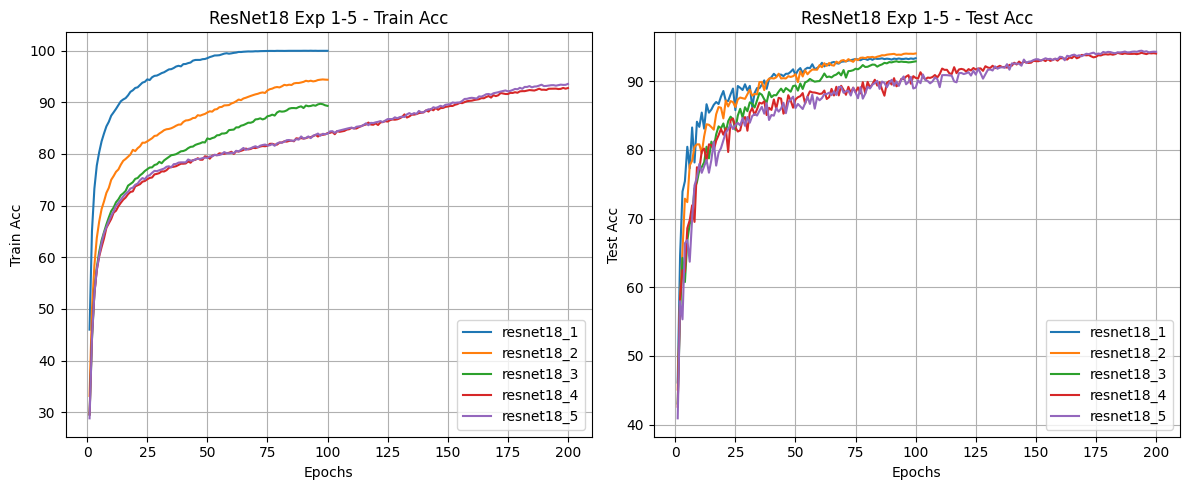

In [5]:
# Comparing train-test accuracies
plot_experiments(['resnet18_1', 'resnet18_2', 'resnet18_3', 'resnet18_4', 'resnet18_5'], 'ResNet18 Exp 1-5')

## Comparing ResNet Architectures

```python
# Same training configurations
TRAIN_BATCH_SIZE = 128
TEST_BATCH_SIZE = 100
EPOCHS = 100
AUGMENTATIONS = [
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.RandomGrayscale(p=0.2)
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
SCHEDULER = optim.lr_scheduler.CosineAnnealingLR(OPTIMIZER, T_max=EPOCHS)
```

### <u>ResNet18 Experiment 3</u>
```python
NUM_BLOCKS_PER_LAYER = [2, 2, 2, 2]
NUM_CHANNELS_PER_LAYER = [42, 84, 168, 336]
```
**Total Parameters:** 4,815,940
```python
# Best checkpoint
Epoch: 92/100     LR: 0.00020
TRAIN: Loss: 0.31 Acc: 89.25%
TEST:  Loss: 0.22 Acc: 92.90%
```

### <u>ResNet34 Experiment 1</u>
```python
NUM_BLOCKS_PER_LAYER = [3, 4, 6, 3]
NUM_CHANNELS_PER_LAYER = [31, 62, 124, 248]
```
**Total Parameters:** 4,999,163
```python
# Best checkpoint
Epoch: 93/100     LR: 0.00016
TRAIN: Loss: 0.32 Acc: 89.03%
TEST:  Loss: 0.23 Acc: 92.61%
``` 

### <u>ResNet50 Experiment 1</u>
```python
NUM_BLOCKS_PER_LAYER = [3, 4, 6, 3]
NUM_CHANNELS_PER_LAYER = [29, 58, 116, 232]
```
**Total Parameters:** 4,848,027
```python
# Best checkpoint
Epoch: 97/100     LR: 0.00004
TRAIN: Loss: 0.31 Acc: 89.45%
TEST:  Loss: 0.22 Acc: 92.88%
``` 

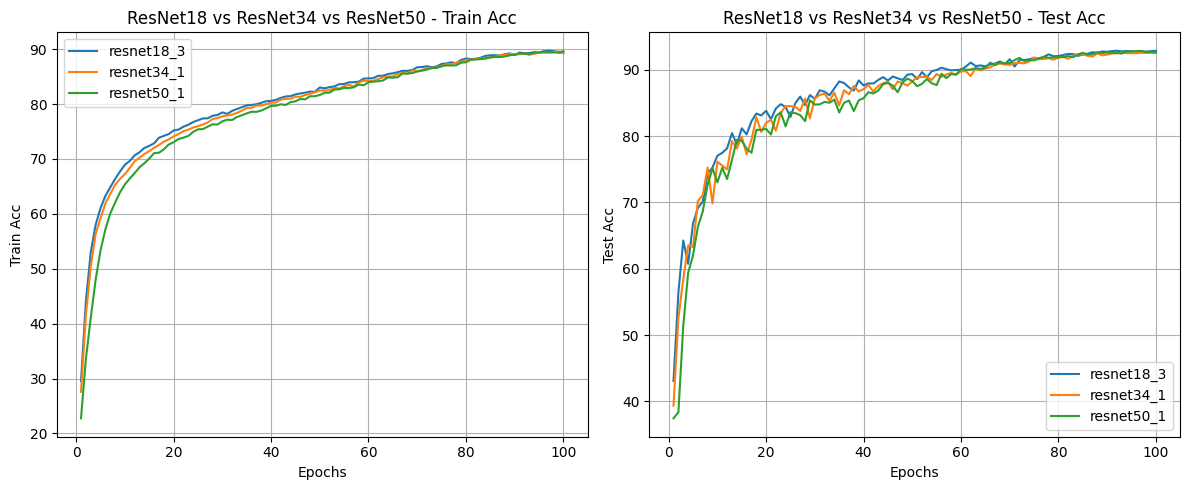

In [6]:
# Comparing test accuracies
plot_experiments(['resnet18_3', 'resnet34_1', 'resnet50_1'], 'ResNet18 vs ResNet34 vs ResNet50')

## ResNet50 Experiments 1-3

```python
# Same model architecture
NUM_BLOCKS_PER_LAYER = [3, 4, 6, 3]
NUM_CHANNELS_PER_LAYER = [29, 58, 116, 232]
``` 
**Total Parameters:** 4,848,027

### <u>Experiment 1</u>
```python
TRAIN_BATCH_SIZE = 128
TEST_BATCH_SIZE = 100
EPOCHS = 100
AUGMENTATIONS = [
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.RandomGrayscale(p=0.2)
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
SCHEDULER = optim.lr_scheduler.CosineAnnealingLR(OPTIMIZER, T_max=EPOCHS)

# Best checkpoint
Epoch: 97/100     LR: 0.00004
TRAIN: Loss: 0.31 Acc: 89.45%
TEST:  Loss: 0.22 Acc: 92.88%
```

### <u>Experiment 2</u>
```python
EPOCHS = 200    # UPDATED to 200
AUGMENTATIONS = [
    ...
    transforms.RandAugment(num_ops=2, magnitude=12)     # UPDATED magnitude=12
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=8e-4)     # UPDATED weight_decay=8e-4

# Best checkpoint
Epoch: 182/200    LR: 0.00022
TRAIN: Loss: 0.23 Acc: 92.16%
TEST:  Loss: 0.18 Acc: 94.43%
```

**Inference Acc:** 84.22%

### <u>Experiment 3</u>
```python
# UPDATED to OneCycleLR
SCHEDULER = optim.lr_scheduler.OneCycleLR(OPTIMIZER, max_lr=0.05, total_steps=EPOCHS, final_div_factor=100)

# Best checkpoint
Epoch: 195/200    LR: 0.00018
TRAIN: Loss: 0.30 Acc: 89.67%
TEST:  Loss: 0.17 Acc: 94.26%
```

**Inference Acc:** 83.68%

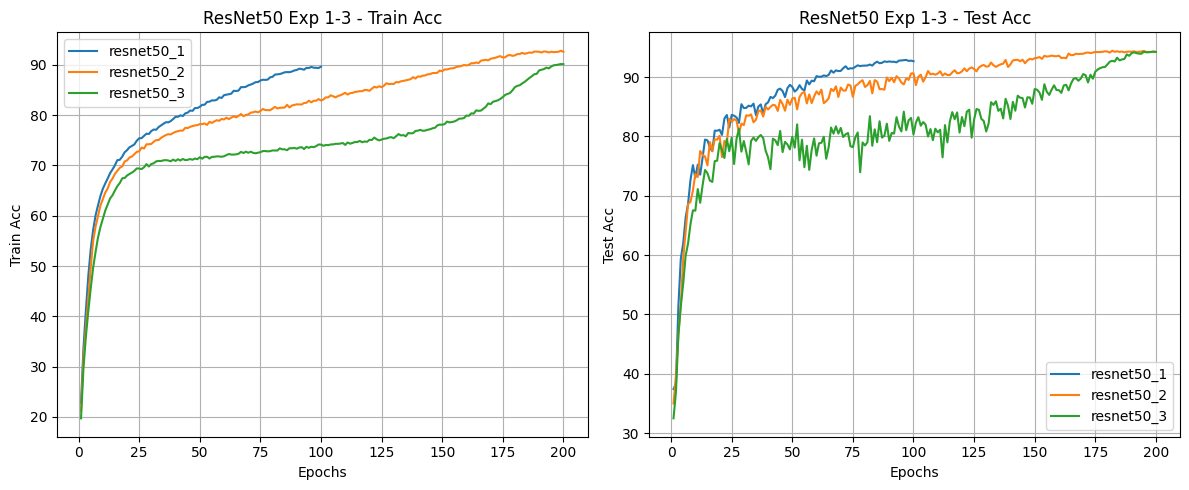

In [7]:
# Comparing test accuracies
plot_experiments(['resnet50_1', 'resnet50_2', 'resnet50_3'], 'ResNet50 Exp 1-3')

## ResNet50 Experiments 3.1-3.2

```python
# Same model architecture
NUM_BLOCKS_PER_LAYER = [3, 4, 6, 3]
NUM_CHANNELS_PER_LAYER = [29, 58, 116, 232]
``` 
**Total Parameters:** 4,848,027

```python
# Experiment 3 Checkpoint
Epoch: 195/200    LR: 0.00018
TRAIN: Loss: 0.30 Acc: 89.67%
TEST:  Loss: 0.17 Acc: 94.26%
```

### <u>Experiment 3.1</u>
(Trained from Experiment 3's best checkpoint)
```python
EPOCHS = 50
AUGMENTATIONS = [
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandAugment(num_ops=2, magnitude=12),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.RandomGrayscale(p=0.2)
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.00018, momentum=0.9, weight_decay=8e-4)              # UPDATED lr=0.00018 (Exp 3 Checkpoint LR)
SCHEDULER = optim.lr_scheduler.ReduceLROnPlateau(OPTIMIZER, mode='max', factor=0.5, patience=5)     # UPDATED to ReduceLROnPlateau

# Best checkpoint
Epoch: 9/50       LR: 0.00018
TRAIN: Loss: 0.29 Acc: 90.22%
TEST:  Loss: 0.17 Acc: 94.57%
```

### <u>Experiment 3.2</u>
(Trained from Experiment 3's best checkpoint)
```python
# UPDATED back to OneCycleLR max_lr=0.0035 (Exp 3 best performing lr at epoch 176)
SCHEDULER = optim.lr_scheduler.OneCycleLR(OPTIMIZER, max_lr=0.0035, total_steps=EPOCHS, final_div_factor=50)

# Best checkpoint
Epoch: 50/50      LR: 0.00000
TRAIN: Loss: 0.24 Acc: 91.80%
TEST:  Loss: 0.16 Acc: 95.04%
```

**Inference Acc:** 84.52%

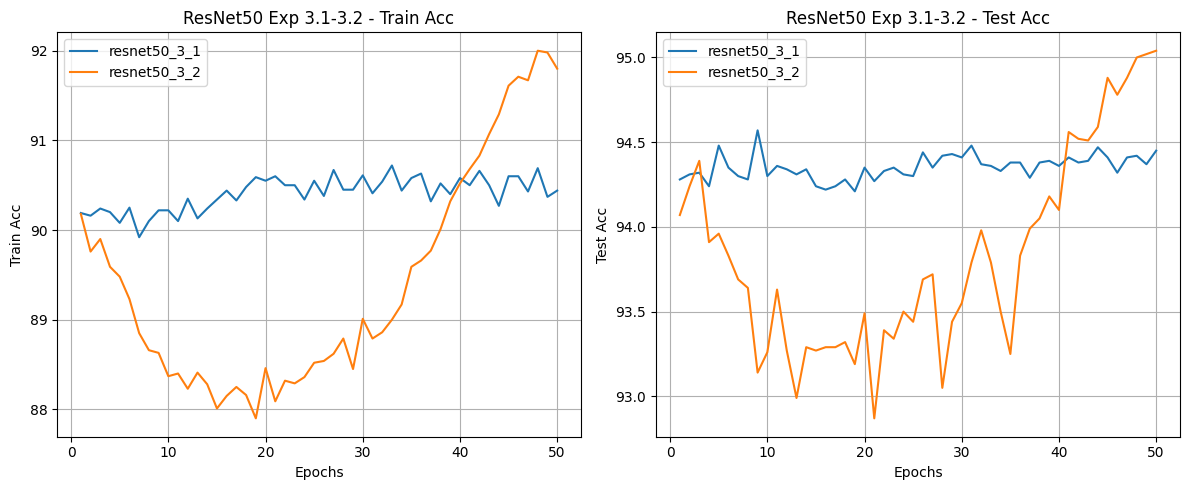

In [8]:
# Comparing test accuracies
plot_experiments(['resnet50_3_1', 'resnet50_3_2'], 'ResNet50 Exp 3.1-3.2')

## ResNet50 Experiments 3.2.1-3.2.3

```python
# Same model architecture
NUM_BLOCKS_PER_LAYER = [3, 4, 6, 3]
NUM_CHANNELS_PER_LAYER = [29, 58, 116, 232]
``` 
**Total Parameters:** 4,848,027

```python
# Experiment 3.2 Checkpoint
Epoch: 50/50      LR: 0.00000
TRAIN: Loss: 0.24 Acc: 91.80%
TEST:  Loss: 0.16 Acc: 95.04%
```

### <u>Experiment 3.2.1</u>
(Trained from Experiment 3.2's best checkpoint)
```python
EPOCHS = 50
AUGMENTATIONS = [
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandAugment(num_ops=2, magnitude=12),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.RandomGrayscale(p=0.2)
]
OPTIMIZER = optim.SGD(model.parameters(), momentum=0.9, weight_decay=1e-3)                                      # UPDATED weight_decay=1e-3
SCHEDULER = optim.lr_scheduler.OneCycleLR(OPTIMIZER, max_lr=0.0025, total_steps=EPOCHS, final_div_factor=50)    # UPDATED max_lr=0.0025 (Exp 3.2's max_lr=0.0035)

# Best checkpoint
Epoch: 46/50      LR: 0.00008
TRAIN: Loss: 0.22 Acc: 92.57%
TEST:  Loss: 0.16 Acc: 94.97%
```

### <u>Experiment 3.2.2</u>
(Trained from Experiment 3.2's best checkpoint)
```python
CUTMIX_MIXUP = True     # ADDED

# Best checkpoint
Epoch: 48/50      LR: 0.00002
TRAIN: Loss: 1.19 Acc: 72.78%
TEST:  Loss: 0.28 Acc: 94.71%
```

**Inference Acc:** 84.68%

### <u>Experiment 3.2.3</u>
(Trained from Experiment 3.2's best checkpoint)
```python
EPOCHS = 100    # UPDATED to 100
CUTMIX_MIXUP = True

# Best checkpoint
Epoch: 95/100     LR: 0.00003
TRAIN: Loss: 1.16 Acc: 73.96%
TEST:  Loss: 0.30 Acc: 94.98%
```

**Inference Acc:** 85.38%

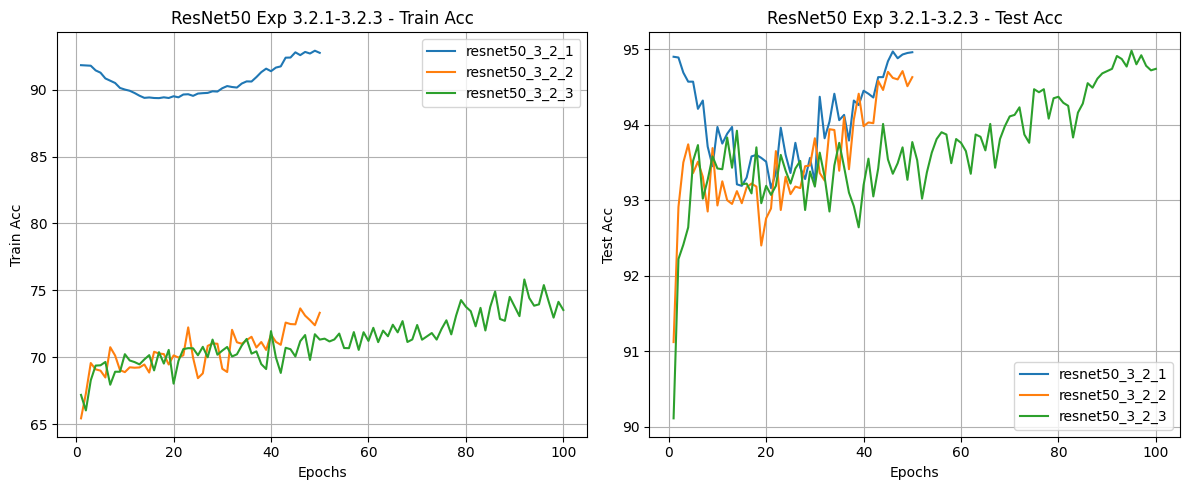

In [9]:
# Comparing test accuracies
plot_experiments(['resnet50_3_2_1', 'resnet50_3_2_2', 'resnet50_3_2_3'], 'ResNet50 Exp 3.2.1-3.2.3')

## ResNet50 Experiment Progression for Final Model

```python
# Same model architecture
NUM_BLOCKS_PER_LAYER = [3, 4, 6, 3]
NUM_CHANNELS_PER_LAYER = [29, 58, 116, 232]
``` 
**Total Parameters:** 4,848,027

### <u>Experiment 3</u>
```python
EPOCHS = 200
AUGMENTATIONS = [
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandAugment(num_ops=2, magnitude=12),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.RandomGrayscale(p=0.2)
]
OPTIMIZER = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=8e-4)
SCHEDULER = optim.lr_scheduler.OneCycleLR(OPTIMIZER, max_lr=0.05, total_steps=EPOCHS, final_div_factor=100)

# Best checkpoint
Epoch: 195/200    LR: 0.00018
TRAIN: Loss: 0.30 Acc: 89.67%
TEST:  Loss: 0.17 Acc: 94.26%
```
**Inference Acc:** 83.68%

### <u>Experiment 3.2</u>
Trained from Experiment 3's best checkpoint for an additional 50 epochs with OneCycleLR max_lr=0.0035 (Exp 3 best performing lr at epoch 176)
```python
EPOCHS = 50
AUGMENTATIONS (same)
OPTIMIZER (same)
SCHEDULER = optim.lr_scheduler.OneCycleLR(OPTIMIZER, max_lr=0.0035, total_steps=EPOCHS, final_div_factor=50)

# Best checkpoint
Epoch: 50/50      LR: 0.00000
TRAIN: Loss: 0.24 Acc: 91.80%
TEST:  Loss: 0.16 Acc: 95.04%
```
**Inference Acc:** 84.52%

### <u>Experiment 3.2.3</u>
Trained from Experiment 3.2's best checkpoint for an additional 100 epochs with CutMix/MixUp and updated weight_decay=1e-3 and max_lr=0.0025
```python
EPOCHS = 100
AUGMENTATIONS (same)
OPTIMIZER = optim.SGD(model.parameters(), momentum=0.9, weight_decay=1e-3)
SCHEDULER = optim.lr_scheduler.OneCycleLR(OPTIMIZER, max_lr=0.0025, total_steps=EPOCHS, final_div_factor=50)
CUTMIX_MIXUP = True

# Best checkpoint
Epoch: 95/100     LR: 0.00003
TRAIN: Loss: 1.16 Acc: 73.96%
TEST:  Loss: 0.30 Acc: 94.98%
```
**Inference Acc:** 85.38%

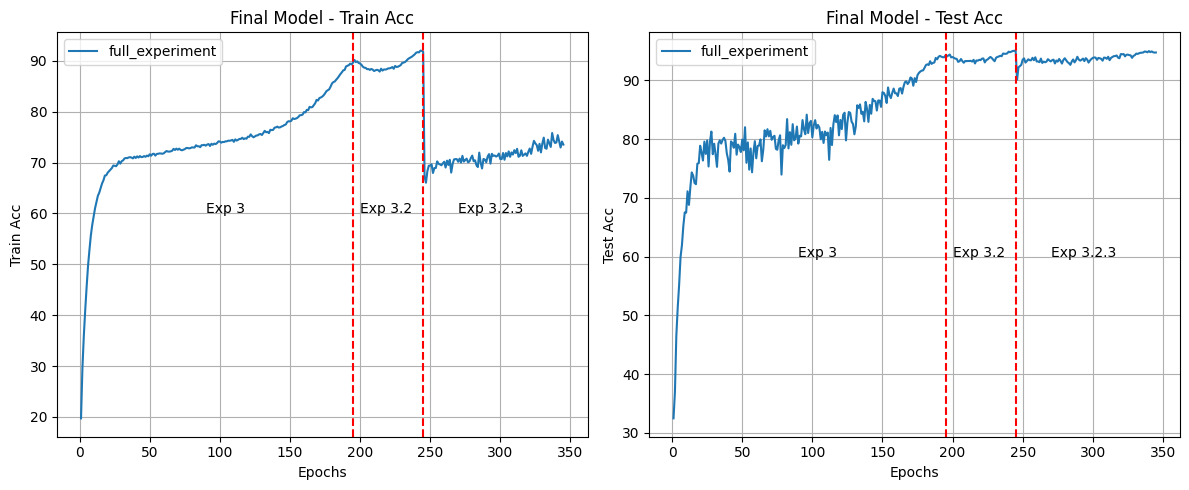

In [10]:
# Experiments used to produce final model
full_experiment = ['resnet50_3', 'resnet50_3_2', 'resnet50_3_2_3']

# Build full experiment based on checkpoints
full_experiment_df = pd.DataFrame()
epoch_offset = 0

for exp in full_experiment:
    if exp in experiments:
        df = experiments[exp].copy()

        # Take first 195 epochs of resnet50_3 (best checkpoint)
        if exp == 'resnet50_3':
            df = df[df['Epoch'] <= 195]

        df['Epoch'] = df['Epoch'] - df['Epoch'].min() + 1 + epoch_offset  # Adjust epoch numbers sequentially
        full_experiment_df = pd.concat([full_experiment_df, df], ignore_index=True)
        epoch_offset = full_experiment_df['Epoch'].max()  # Update offset for the next experiment

# Store full experiment data in experiments
experiments['full_experiment'] = full_experiment_df

# Plot train-test accuracies
fig, axes = plot_experiments(['full_experiment'], 'Final Model', plot=False)

# Apply to each plot
for ax in axes:
    # Experiment borders
    ax.axvline(x=195, color='red', linestyle='--')
    ax.axvline(x=245, color='red', linestyle='--')

    # Experiment labels
    ax.text(90, 60, 'Exp 3')
    ax.text(200, 60, 'Exp 3.2')
    ax.text(270, 60, 'Exp 3.2.3')

plt.show()